



#  Machine Learning and Statistics Project





![title](Images/image1.jpg)

# Topic:
## Use a Model to Predict The Power Wind Speed Generates. 
## Create a Web Service That Makes Predictions

### Project Overview

In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests. 

### Project Requirements

**Your submission must be in the form of a git repository containing, at a minimum, the following items:**

1. Jupyter notebook that trains a model using the data set. In the notebook you should explain your model and give an analysis    of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.
5. Can add more than one model if you like. 

### Getting Started

**What is the Powerproduction Dataset?**

We will base our model on values which we are given in a dataset, wind turbine power output from wind speed values. Wind energy has emerged as a promising alternative source for overcoming the energy crisis in the world, and will help reduce the carbon footprint. Wind Power is a rapidly growning renewable energy source, this will only continue to grow due to concerns about climate warming. 

The uncertain nature of wind and high penetration of wind energy in power systems are a big challenge to the reliability and stability of these systems. To make wind energy a reliable source, accurate models for predicting the power output and performance monitoring of wind turbines are needed. We will create models below based on the values we already have, train the algorithm, and if a different wind speed is given, what will the that power output be. So basically, will forecast how much power you will use when the wind is a certain speed.


Source(Smart Energy)![title](Images/image3.jpg)



### Import Libraries

First we will **import libraries**, these are built in packages in Python which we will be using for our project. 

In [1]:
# Import packages 

import sklearn.neighbors as nei # sub package from scikitlearn.

# Need to import specific package with Scikitlearn.

import pandas as pd # Data structures and operations for manipulating numerical tables and time series.

import numpy as np # Fundamental package for array computing with Python.

import random # Returns random values.

import seaborn as sns # Data Visualization Library. 

import matplotlib.pyplot as plt# Creates a plotting area in a figure, plots some lines in a plotting area, adds labels.

# Magic function in IPython, function that renders the figure in a notebook.
%matplotlib inline

import scipy.stats as ss # Calculates the arithmetic mean of the array elements along the specified axis of the array.

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

### Pandas 

For data manipulation and analysis of our dataset.

In [2]:
# import dataset
ds = pd.read_csv("./powerproduction.csv")

In [3]:
# display contents
ds

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [4]:
# Locates data row two through eight.
ds.loc[2:8]

,speed,power
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048


In [5]:
# Gives acess and outputs data on your index from row two. Index displayed on left side, numbers the rows.
# iloc is position of rows
# loc gets you index
ds.iloc[2]

speed    0.15
power    0.00
Name: 2, dtype: float64

In [6]:
# Finds individual cell
ds.at[5, 'speed']

0.325

### Summary Stats

In [6]:
ds.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


Average speed and power.

In [7]:
ds.mean()

speed    12.590398
power    48.014584
dtype: float64

In [8]:
# SELECT FROM ds WHERE speed >= 24 
ds[(ds['speed'] >= 24)]

,speed,power
481,24.024,105.992
482,24.049,93.524
483,24.174,95.869
484,24.199,101.419
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223
489,24.399,95.117
490,24.499,0.000


Lets find out some information on our variables. 

In [9]:
# max speed
maxs = ds["speed"]
max_value = maxs.max()
print(max_value)

25.0


In [10]:
# min speed
min = ds["speed"]
min_value = min.min()
print(min_value)

0.0


In [11]:
# max power
maxs = ds["power"]
max_value = maxs.max()
print(max_value)

113.556


In [12]:
# min speed
min = ds["power"]
min_value = min.min()
print(min_value)

0.0


In [10]:
sp = ds[(ds['speed'] >= 0) & (ds['speed'] <= 3)]
print(ds)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


### Cleaning Data

We can see from avove that some of the values for wind speed at 2kph generate zero to six or seven ouputs, and others generate higher speed outputs of 14, and many other generate zero outputs of power. This needs to be cleaned up.

https://medium.com/@rrfd/cleaning-and-prepping-data-with-python-for-data-science-best-practices-and-helpful-packages-af1edfbe2a3

**Before Cleaning**

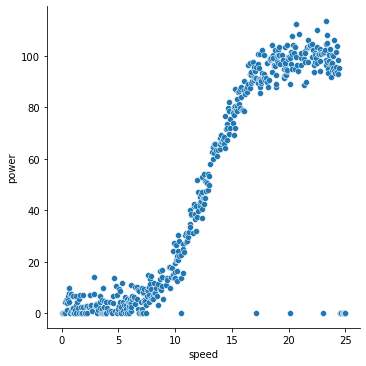

In [11]:
# Plot values for ds
sns.relplot(x="speed", y="power", data=ds); 

As we can see we have some values where 0 power and wind values. 

In [12]:
ds[ds.power == 0].count()

speed    49
power    49
dtype: int64

In [14]:
# Select data from speed & power = to 0.
clean_d = ds[(ds["speed"]==0) & (ds["power"]==0)]

# Values where greater than 0
above_zero = ds[(ds["speed"]>0) & (ds["power"]>0)]

# Re-adjust data
clean_d = clean_d.append(above_zero)

clean_d

,speed,power
0,0.000,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


- We can see from above it removed the 49 values that = 0 and kept 1. 

**Before Cleaning**

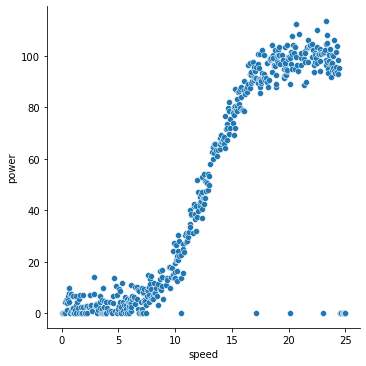

In [15]:
# Plot values for ds
sns.relplot(x="speed", y="power", data=ds); 

**After cleaning.**

- Elminated all the zero values.

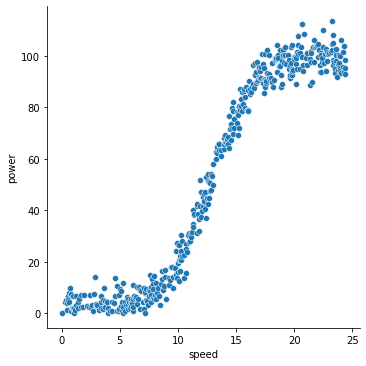

In [16]:
# Plot values for ds
sns.relplot(x="speed", y="power", data=clean_d);

### Visualize your data-set with Seaborn.

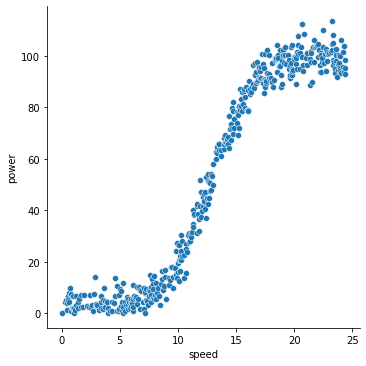

In [15]:
# Plot values for ds
sns.relplot(x="speed", y="power", data=clean_d); 

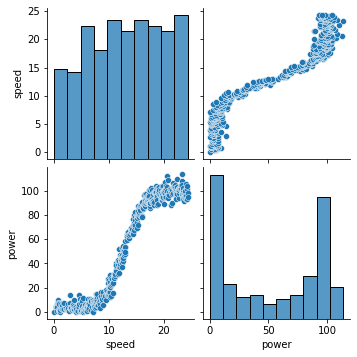

In [16]:
# Import Seaborn Package. Sometimes Jupyter can be a bit finicky with Seborn,
# May need to run it twice.
# plot the data with a pair plot
sns.pairplot(clean_d)

**Before Cleaning**

<AxesSubplot:xlabel='speed', ylabel='power'>

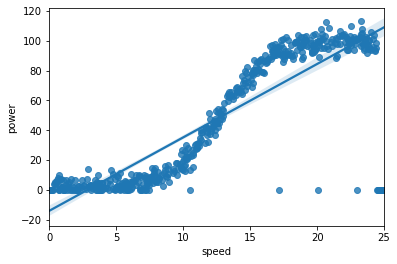

In [20]:

# Pick out two variables.
power = ds[["speed", "power"]].dropna()
# Scatter and fit line for just those two variables.
sns.regplot(x="speed", y="power", data=ds)

#### After cleaning

<AxesSubplot:xlabel='speed', ylabel='power'>

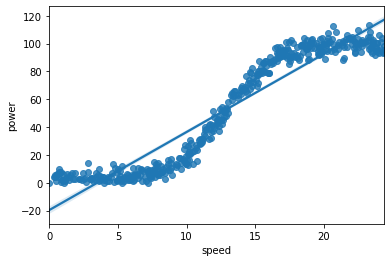

In [21]:
# Pick out two variables.
power = clean_d[["speed", "power"]].dropna()
# Scatter and fit line for just those two variables.
sns.regplot(x="speed", y="power", data=clean_d)

We can see that it is very similar to the multi-plot three cells above. The line gives you the best accuracy, and the shading at the top, gives you the impression that their is more uncertainty at the top than the bottom.

- Train

So now we try and come up with the parameters for the line, and make predictions of power gen from x input(wind speed).

## Model One: Function

#### Train your model

Function and Models Create a function that can take an input x, and will have previously trained a list of values p, that help us make predictions, if the input is x, what is the output.

When you combine the input x, with the values in p, you have an algorithm that says yes or no.

In [22]:
# Takes two arguments, x is input for function,
# and p, which will be a list of values, that have been trained somehow on a dataset.

def f(x, p): 
    return p[0] + x * p[1] # 1st element in p (list), + x (input) * second value of p.

#### Analysis
- Train a simple model.
We willl use Power production dataset, consisting of 2 variables, wind and speed.

We have to come up with a function that predicts the power generated from wind speed.

In [31]:

# Manipulating two lists of numbers, one x and one y.
x = power["speed"].to_numpy()
y = power["power"].to_numpy()
x = x.reshape(-1, 1)


model = LinearRegression() # scikit learn gets the numbers for the line above on linear graph, and use linear regression.

model.fit(x, y) # gives body mass and flipper length values
r = model.score(x, y) # then ask whas the r value on the dataset
p = [model.intercept_, model.coef_[0]] # when x is zero where does y cut the axis, model.coef is the coefficient of x.

#### We ask what was the fit like?

**R-Value**

The relationship between two variables is generally considered strong when their r value is larger than 0.7. The correlation r measures the strength of the linear relationship between two quantitative variables.

#### Before cleaning the data, it displayed an r of 7.2. After we can see it is significatly higher, nealy .9. 

In [32]:
r

0.8983450728341917

**What was the coefficient?**

In [33]:
p

[-19.6362329967708, 5.606684691495633]

So we can see that -19.6 seems to be the absolute minimum power we would expect.

The second part of the data states that for km you go up in wind speed, it seems to add 5 extra ouptuts in power. So if you go up 1 kph in wind speed, you will get around 5.6 outputs of power generated.

**Predict**

Now we call f, our fuction, and ask if we had a wind speed at 11 kph, what would it's power generated be?

In [26]:
# Based on the p from training the model.
f(11.0, p)

42.03729860968116

Go up 1 kph in wind speed from 11 to 12, should generate power of an incraese of roughly 5 outputs of power.

In [27]:
f(12.0, p)

47.64398330117679

We can see here that our training model was not far off.

In [28]:
o = ds[(ds['speed'] >= 12) & (ds['speed'] <= 13)]
o

,speed,power
237,12.037,39.584
238,12.162,41.599
239,12.187,45.056
240,12.212,43.198
241,12.262,46.136
242,12.287,43.454
243,12.337,47.282
244,12.362,40.519
245,12.387,37.159
246,12.412,52.952


Can see our aveage for wind at 12kph is indeed a power output of 47. 

In [29]:
o.mean()

speed    12.520833
power    46.581458
dtype: float64

### Summary
You have to think about functions, not a lot to get in terms of calculations in Machine Learning & Statistics. It's the ideas in terms of what the calculations mean in the real world that are important. The functions takes two inputs, one that you give it and the other was the data from the dataset we trained it on. P might only change if we got a lot wind values and added them in, and the linear line might change then.

## Model Two

## Using A Neural Network to train your model. 

### Neural Networks

**Neural networks** are a means of doing machine learning, in which a computer learns to perform some task by analyzing training examples. Usually, the examples have been hand-labeled in advance. An object recognition system, for instance, might be fed thousands of labeled images of cars, houses, coffee cups, and so on, and it would find visual patterns in the images that consistently correlate with particular labels.

Modeled loosely on the human brain, a neural net consists of thousands or even millions of simple processing nodes that are densely interconnected. Most of today’s neural nets are organized into layers of nodes, and they’re “feed-forward,” meaning that data moves through them in only one direction. An individual node might be connected to several nodes in the layer beneath it, from which it receives data, and several nodes in the layer above it, to which it sends data.



Bunch of inputs coming in, once the inputs get big enough, they fire outputs to other neural networks.

Start out with dataset, containing variables.
Subset will be input variables
Subset will be output variables

For example, the first four variales in iris Dataset, sepal mength and width, petal lenght and width, are input variables, and the fifth variable species is your class, or output variable.

When you have your model trained, and it's stable, put new values through your neural network, and it will predict what the value is based on it's training. (M.I.T, 2017)



![title](Images/image5.png)

#### Neural network vs deep neural network, no difference, just more layers in deep network.

#### Weights and biases in Neural Networks
Weights and biases (commonly referred to as w and b) are the learnable parameters of a machine learning model.
Neurons are the basic units of a neural network. In an ANN, each neuron in a layer and is connected to each neuron in the next layer. When the inputs are transmitted between neurons, the weights are applied to the inputs along with the bias.

#### Weights
Weights control the signal (or the strength of the connection) between two neurons. In other words, a weight decides how much influence the input will have on the output. Biases, which are constant, are an additional input into the next layer that will always have the value of 1. Bias units are not influenced by the previous layer (they do not have any incoming connections) but they do have outgoing connections with their own weights. The bias unit guarantees that even when all the inputs are zeros there will still be an activation in the neuron. (Paperspace, 2019)


Machine learning is all about inputs and outputs, and getting a good result.

### Here we will be using Keras. 

Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models. It wraps the efficient numerical computation libraries Theano and TensorFlow and allows you to define and train neural network models in just a few lines of code. For a more detailed look at how it works and get started please look <a href="https://keras.io/getting_started/intro_to_keras_for_engineers/">here.</a>

![title](Images/image6.png)

**How to install Keras and Tensorflow**
- Update your Anaconda enviroment 
- Type in the following commands on your command line. 

1. conda update conda
2. conda update --all
3. pip install tensorflow


- Now you are ready to start using Tensorflow and Keras.





#### Neural Networks

Code dapted from: 

https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/

https://github.com/ianmcloughlin/jupyter-teaching-notebooks

In [105]:
# Neural networks.
import tensorflow.keras as kr

In [106]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

### Here we use our dataset

In [107]:
# Import Dataset
#df = pd.read_csv("./powerproduction.csv")
dataset = clean_d
dataset

,speed,power
0,0.000,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


Now that we’ve seen what our data looks like, we want to convert it into arrays for our machine to process:

Now we split our dataset into input features (X) and the feature we wish to predict (Y). We simply assign the first column of our array to a variable called X and the last column of our array to a variable called Y. 

In [108]:
# converting our data into arrays
ds = dataset.values
ds

array([[0.00000e+00, 0.00000e+00],
       [3.25000e-01, 4.33100e+00],
       [4.00000e-01, 5.18600e+00],
       [4.50000e-01, 3.82600e+00],
       [5.01000e-01, 1.04800e+00],
       [5.26000e-01, 5.55300e+00],
       [5.51000e-01, 6.49800e+00],
       [5.76000e-01, 5.24100e+00],
       [6.26000e-01, 4.22000e+00],
       [6.76000e-01, 7.97400e+00],
       [7.01000e-01, 9.74600e+00],
       [8.01000e-01, 7.27100e+00],
       [8.26000e-01, 7.95000e-01],
       [8.51000e-01, 7.35000e+00],
       [9.26000e-01, 1.99600e+00],
       [9.51000e-01, 1.60900e+00],
       [9.76000e-01, 2.06400e+00],
       [1.00100e+00, 6.51100e+00],
       [1.05100e+00, 2.08500e+00],
       [1.10100e+00, 1.21000e-01],
       [1.15100e+00, 1.20800e+00],
       [1.25100e+00, 3.37300e+00],
       [1.27600e+00, 6.51000e+00],
       [1.40100e+00, 4.15600e+00],
       [1.42600e+00, 2.00500e+00],
       [1.50200e+00, 5.35200e+00],
       [1.65200e+00, 7.22100e+00],
       [1.70200e+00, 2.43900e+00],
       [1.87700e+00,

Assign the variables

We now split our dataset into input features (X) and the label of what we want to predict (Y).

Here we can see our values for training, testing and validation for both variables, speed and power.. 

316 values for training, 136 for testing. 

In [115]:
X = ds[:,0]
Y = ds[:,1]

In [109]:

# Split dataset and train it, 70% for training ds, and 30% for test dataset.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=30)

# Shows train and test values
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(316,) (136,) (316,) (136,)


### Now we build and train our neural network.

In [119]:
# Create a neural network with one neuron.

# keras models sub package, for building up Sequential layers.
model = kr.models.Sequential()

# Add layers
# Add a single neuron in a single layer, initialised with weight 1 and bias 0.
# Dense, add everything in previous layer to current layer.
# 1 parameter, input_dim(tells seq model one input), 
# Kernal _iniat activates the weights to 1's, bias iniat to 0.
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))

# Compile the model. Create neuron network. 
# optimzer changes weights in biases to move in direction of the expected outputs
# loss = figues out cal that neural net does, is it getting closer to expected outputs, or further away. 
# Optimizer looks at loss, based on trainiing set we give it, and shakes n.network a little to give expected outputs.
model.compile(optimizer='adam', loss='mean_squared_error') # optimizer = adam
# weights and bias get nudged by the optimizer, amount the get nudged by is related to learning rate, term for number.

### Fit Training Dataset to Neural Network

- Train the neural network on our training data.
- Takes a list of x values, and a list of corresponding y values. 
- 1st x value corresponds with 1st y value and so on. 
- Goes into neural network and passes x values through neural network,
- To see what n net is telling us, would be the y value that it is predicting.
- Compare that using means squared error to what we wnat the y val to be for corresponding x value. 
- What we're looking for neural net to do, is look at all the x and y values, that we have generated, 
- and tell us how they were generated. 
- It knows that we gave it x and y values, and a linear relationship between them, 
- because we chose a linear activation in the model above. 

In [120]:
his = model.fit(X_train, Y_train, validation_split = 0.25, batch_size=10, epochs=500)

# Epoch is the num of times each x value goes through neural network
# each time it goes through, neural n tries to improve it's predictions. 
# 100 values = 500k times through neural network.
# loss function below 1st value has a loss value of 13606, -y, square that, sum of all of those diff squares,
# maybe divide by 1000. That is the means sqaured error, we just mentioned above.
# Weight and the bias, neural net keeps nudging it in right direction every time it runs it through,
# Can see below that the value keeps decreasing.
# Our total loss at the end is quite significant.

Epoch 1/500
24/24 [==============================] - 1s 29ms/step - loss: 2733.8969 - val_loss: 2719.5496
Epoch 2/500
24/24 [==============================] - 0s 5ms/step - loss: 2792.1760 - val_loss: 2684.2173
Epoch 3/500
24/24 [==============================] - 0s 4ms/step - loss: 2857.3053 - val_loss: 2648.2793
Epoch 4/500
24/24 [==============================] - 0s 5ms/step - loss: 2608.6436 - val_loss: 2613.7051
Epoch 5/500
24/24 [==============================] - 0s 4ms/step - loss: 2522.6370 - val_loss: 2579.7222
Epoch 6/500
24/24 [==============================] - 0s 5ms/step - loss: 2556.2905 - val_loss: 2545.1426
Epoch 7/500
24/24 [==============================] - 0s 5ms/step - loss: 2757.3092 - val_loss: 2511.4109
Epoch 8/500
24/24 [==============================] - 0s 5ms/step - loss: 2535.6450 - val_loss: 2478.7329
Epoch 9/500
24/24 [==============================] - 0s 5ms/step - loss: 2777.9712 - val_loss: 2445.1821
Epoch 10/500
24/24 [==============================] - 

24/24 [==============================] - 0s 4ms/step - loss: 1019.7964 - val_loss: 910.7142
Epoch 79/500
24/24 [==============================] - 0s 4ms/step - loss: 936.1154 - val_loss: 897.2361
Epoch 80/500
24/24 [==============================] - 0s 4ms/step - loss: 938.6452 - val_loss: 883.7691
Epoch 81/500
24/24 [==============================] - 0s 4ms/step - loss: 953.3476 - val_loss: 870.7366
Epoch 82/500
24/24 [==============================] - 0s 4ms/step - loss: 892.0382 - val_loss: 858.1882
Epoch 83/500
24/24 [==============================] - 0s 4ms/step - loss: 967.0015 - val_loss: 845.3329
Epoch 84/500
24/24 [==============================] - 0s 4ms/step - loss: 948.5156 - val_loss: 833.1368
Epoch 85/500
24/24 [==============================] - 0s 4ms/step - loss: 833.3566 - val_loss: 820.9501
Epoch 86/500
24/24 [==============================] - 0s 4ms/step - loss: 854.1993 - val_loss: 808.5522
Epoch 87/500
24/24 [==============================] - 0s 4ms/step - loss: 76

24/24 [==============================] - 0s 5ms/step - loss: 349.4550 - val_loss: 345.0670
Epoch 157/500
24/24 [==============================] - 0s 4ms/step - loss: 366.6680 - val_loss: 342.5394
Epoch 158/500
24/24 [==============================] - 0s 4ms/step - loss: 335.3657 - val_loss: 340.1455
Epoch 159/500
24/24 [==============================] - 0s 4ms/step - loss: 367.2119 - val_loss: 337.7201
Epoch 160/500
24/24 [==============================] - 0s 4ms/step - loss: 334.5642 - val_loss: 335.6776
Epoch 161/500
24/24 [==============================] - 0s 4ms/step - loss: 325.1916 - val_loss: 333.2937
Epoch 162/500
24/24 [==============================] - 0s 4ms/step - loss: 339.8897 - val_loss: 331.1529
Epoch 163/500
24/24 [==============================] - 0s 4ms/step - loss: 352.1791 - val_loss: 329.1499
Epoch 164/500
24/24 [==============================] - 0s 4ms/step - loss: 327.3848 - val_loss: 327.1131
Epoch 165/500
24/24 [==============================] - 0s 5ms/step - 

24/24 [==============================] - 0s 4ms/step - loss: 257.8752 - val_loss: 282.8740
Epoch 235/500
24/24 [==============================] - 0s 4ms/step - loss: 248.4639 - val_loss: 282.7842
Epoch 236/500
24/24 [==============================] - 0s 4ms/step - loss: 251.8196 - val_loss: 282.7338
Epoch 237/500
24/24 [==============================] - 0s 4ms/step - loss: 274.6307 - val_loss: 282.6374
Epoch 238/500
24/24 [==============================] - 0s 4ms/step - loss: 272.8990 - val_loss: 282.5961
Epoch 239/500
24/24 [==============================] - 0s 4ms/step - loss: 284.6219 - val_loss: 282.5187
Epoch 240/500
24/24 [==============================] - 0s 4ms/step - loss: 264.6444 - val_loss: 282.4704
Epoch 241/500
24/24 [==============================] - 0s 4ms/step - loss: 275.0566 - val_loss: 282.3591
Epoch 242/500
24/24 [==============================] - 0s 4ms/step - loss: 262.7502 - val_loss: 282.3235
Epoch 243/500
24/24 [==============================] - 0s 4ms/step - 

24/24 [==============================] - 0s 4ms/step - loss: 249.7209 - val_loss: 274.8307
Epoch 313/500
24/24 [==============================] - 0s 4ms/step - loss: 240.0984 - val_loss: 274.6846
Epoch 314/500
24/24 [==============================] - 0s 4ms/step - loss: 276.8875 - val_loss: 274.6305
Epoch 315/500
24/24 [==============================] - 0s 5ms/step - loss: 258.3512 - val_loss: 274.4533
Epoch 316/500
24/24 [==============================] - 0s 4ms/step - loss: 239.2691 - val_loss: 274.3118
Epoch 317/500
24/24 [==============================] - 0s 4ms/step - loss: 279.1958 - val_loss: 274.1231
Epoch 318/500
24/24 [==============================] - 0s 4ms/step - loss: 279.4037 - val_loss: 274.0495
Epoch 319/500
24/24 [==============================] - 0s 4ms/step - loss: 219.3316 - val_loss: 273.9170
Epoch 320/500
24/24 [==============================] - 0s 4ms/step - loss: 251.9153 - val_loss: 273.7939
Epoch 321/500
24/24 [==============================] - 0s 4ms/step - 

24/24 [==============================] - 0s 4ms/step - loss: 248.7147 - val_loss: 264.2733
Epoch 391/500
24/24 [==============================] - 0s 4ms/step - loss: 243.0036 - val_loss: 264.1445
Epoch 392/500
24/24 [==============================] - 0s 4ms/step - loss: 246.3741 - val_loss: 264.0181
Epoch 393/500
24/24 [==============================] - 0s 4ms/step - loss: 269.2598 - val_loss: 263.8804
Epoch 394/500
24/24 [==============================] - 0s 4ms/step - loss: 246.5010 - val_loss: 263.7607
Epoch 395/500
24/24 [==============================] - 0s 4ms/step - loss: 225.7928 - val_loss: 263.6868
Epoch 396/500
24/24 [==============================] - 0s 4ms/step - loss: 257.5538 - val_loss: 263.5271
Epoch 397/500
24/24 [==============================] - 0s 4ms/step - loss: 230.6524 - val_loss: 263.3985
Epoch 398/500
24/24 [==============================] - 0s 4ms/step - loss: 256.3581 - val_loss: 263.3238
Epoch 399/500
24/24 [==============================] - 0s 4ms/step - 

24/24 [==============================] - 0s 4ms/step - loss: 231.4110 - val_loss: 254.4611
Epoch 469/500
24/24 [==============================] - 0s 4ms/step - loss: 231.4569 - val_loss: 254.3103
Epoch 470/500
24/24 [==============================] - 0s 4ms/step - loss: 226.0982 - val_loss: 254.2205
Epoch 471/500
24/24 [==============================] - 0s 4ms/step - loss: 212.8788 - val_loss: 254.0511
Epoch 472/500
24/24 [==============================] - 0s 4ms/step - loss: 208.0828 - val_loss: 254.0515
Epoch 473/500
24/24 [==============================] - 0s 4ms/step - loss: 235.2149 - val_loss: 253.9529
Epoch 474/500
24/24 [==============================] - 0s 4ms/step - loss: 239.5813 - val_loss: 253.6762
Epoch 475/500
24/24 [==============================] - 0s 4ms/step - loss: 236.1269 - val_loss: 253.5925
Epoch 476/500
24/24 [==============================] - 0s 4ms/step - loss: 248.7739 - val_loss: 253.5511
Epoch 477/500
24/24 [==============================] - 0s 4ms/step - 

#### Predict

Here we can see the inputs and what the ouputs will be below. 

- So if speed is 10, output of power will be around 40, 25 above 100 etc..

In [121]:
model.predict([ 10.0, 25.0])

array([[ 43.96175],
       [112.7764 ]], dtype=float32)

In [114]:
# Can see the output for 2-3 kph
o = clean_d[(clean_d['speed'] >= 2) & (clean_d['speed'] <= 3)]
o

,speed,power
45,2.177,2.701
46,2.227,2.869
48,2.402,2.287
49,2.477,6.947
50,2.553,2.370
51,2.578,3.165
52,2.703,0.667
53,2.828,7.559
54,2.853,14.131
55,2.953,2.894


In [124]:
o.mean()

speed    2.5751
power    4.5590
dtype: float64

#### Evaluate train and test values.

In [122]:
model.evaluate(X_train, Y_train)

10/10 [==============================] - 0s 1ms/step - loss: 235.5496


235.54962158203125

In [123]:
model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 2ms/step - loss: 236.2457


236.2457275390625

#### Plot loss and val loss.
We can see in our plot below that the training data was not far off the validation test.

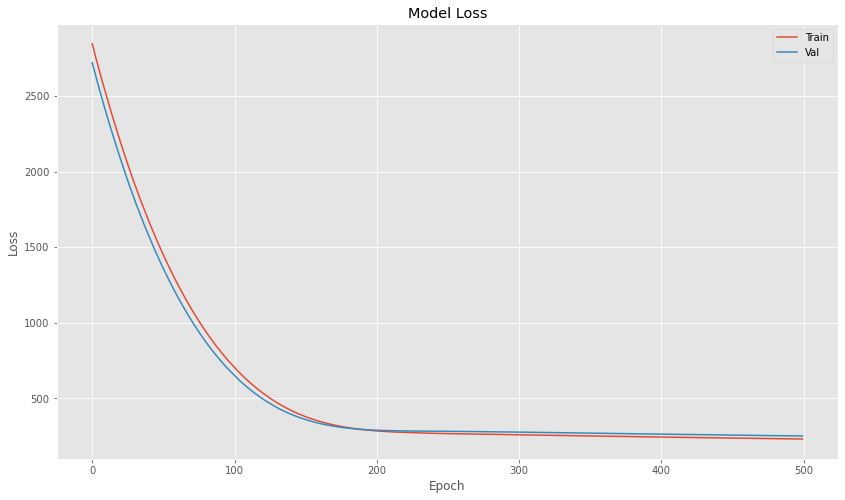

In [127]:
# Plot train vs val 

plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Summary

- Taken a 500 values of speed, power, and started out with a neural network that knows nothing about dataset.
- We trained the neuron. We gave it speed, and power value pairs.
- Trained it using Neuron Network, using Keras.
- It looked at those, and in turn has built in mechanisms, to try and mimic how you would get from x values to the y values.
- Plotted the values from the train and validation values.
- From our plot it looks like our model was not far off. 

### References

Ian Mcloughlin, Jupyter Notebooks, 2020, 2018, viewed on the 2019/12/17, available online at https://github.com/ianmcloughlin/jupyter-teaching-notebooks

Datacamp, KNN, 2018, viewed on the 2019/12/17, available online at:https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

Analytic Steps, 2020, viewed on the 2019/12/17, available online at: https://www.analyticssteps.com/blogs/how-does-k-nearest-neighbor-works-machine-learning-classification-problem

Medium, Cleaning and Prepping Data with Python, 2018, viewed on the 2019/12/19, available online at:  https://medium.com/@rrfd/cleaning-and-prepping-data-with-python-for-data-science-best-practices-and-helpful-packages-af1edfbe2a3

M.I.T News, Neural Networks, 2017, viewed on the 2019/12/19, available online at: https://news.mit.edu/2017/explained-neural-networks-deep-learning-0414

Keras, Introduction to Keras, 2020, viewed on the 2019/12/19, available online at: https://keras.io/getting_started/intro_to_keras_for_engineers/

Paperspace, Weights and Bias, 2019, viewed on the 2019/12/19, available online at: https://docs.paperspace.com/machine-learning/wiki/weights-and-biases




# Needs more tweaking and tidying up. 

### The End